# PSTAT235 Team Assignment -Group 28

In [1]:
# load AZ data
bucket_dir="gs://pstat135-voter-file/VM2Uniform/"
df = spark.read.parquet(bucket_dir + 'VM2Uniform--AZ--2021-05-20')

In [2]:
# Read MA data
dfma = spark.read.parquet(bucket_dir + 'VM2Uniform--MA--2021-01-19')

In [3]:
# load ND data
dfnd = spark.read.parquet(bucket_dir + 'VM2Uniform--ND--2021-03-18')

# EDA

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import split, explode
from pyspark.sql.types import IntegerType

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("Voter Data Analysis").getOrCreate()

In [6]:
# the total records output
df.count()

4266400

In [7]:
# the total records output
dfma.count()

4572639

In [8]:
# the total records output
dfnd.count()

422720

In [9]:
df.printSchema()

root
 |-- SEQUENCE: string (nullable = true)
 |-- LALVOTERID: string (nullable = true)
 |-- Voters_Active: string (nullable = true)
 |-- Voters_StateVoterID: string (nullable = true)
 |-- Voters_CountyVoterID: string (nullable = true)
 |-- VoterTelephones_LandlineAreaCode: string (nullable = true)
 |-- VoterTelephones_Landline7Digit: string (nullable = true)
 |-- VoterTelephones_LandlineFormatted: string (nullable = true)
 |-- VoterTelephones_LandlineUnformatted: string (nullable = true)
 |-- VoterTelephones_LandlineConfidenceCode: string (nullable = true)
 |-- VoterTelephones_CellPhoneOnly: string (nullable = true)
 |-- VoterTelephones_CellPhoneFormatted: string (nullable = true)
 |-- VoterTelephones_CellPhoneUnformatted: string (nullable = true)
 |-- VoterTelephones_CellConfidenceCode: string (nullable = true)
 |-- Voters_FirstName: string (nullable = true)
 |-- Voters_MiddleName: string (nullable = true)
 |-- Voters_LastName: string (nullable = true)
 |-- Voters_NameSuffix: string (

In [24]:
# select some variables we are interested in from the data
df_need = df.select("Voters_Age",
                    "Voters_Gender",
                    "CommercialData_EstimatedHHIncomeAmount", 
                    "CommercialData_EstHomeValue",
                    "CommercialData_Education",
                    "EthnicGroups_EthnicGroup1Desc",
                    "ElectionReturns_G08CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G10CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G12CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G14CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G16CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G18CountyTurnoutAllRegisteredVoters")
df_need.show(10)

+----------+-------------+--------------------------------------+---------------------------+------------------------+-----------------------------+---------------------------------------------------+---------------------------------------------------+---------------------------------------------------+---------------------------------------------------+---------------------------------------------------+---------------------------------------------------+
|Voters_Age|Voters_Gender|CommercialData_EstimatedHHIncomeAmount|CommercialData_EstHomeValue|CommercialData_Education|EthnicGroups_EthnicGroup1Desc|ElectionReturns_G08CountyTurnoutAllRegisteredVoters|ElectionReturns_G10CountyTurnoutAllRegisteredVoters|ElectionReturns_G12CountyTurnoutAllRegisteredVoters|ElectionReturns_G14CountyTurnoutAllRegisteredVoters|ElectionReturns_G16CountyTurnoutAllRegisteredVoters|ElectionReturns_G18CountyTurnoutAllRegisteredVoters|
+----------+-------------+--------------------------------------+-------------

In [27]:
# select some variables we are interested in from the data
dfma_need = dfma.select("Voters_Age",
                    "Voters_Gender",
                    "CommercialData_EstimatedHHIncomeAmount", 
                    "CommercialData_EstHomeValue",
                    "CommercialData_Education",
                        "EthnicGroups_EthnicGroup1Desc",
                    "ElectionReturns_G08CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G10CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G12CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G14CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G16CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G18CountyTurnoutAllRegisteredVoters")

In [28]:
# select some variables we are interested in from the data
dfnd_need = dfnd.select("Voters_Age",
                    "Voters_Gender",
                    "CommercialData_EstimatedHHIncomeAmount", 
                    "CommercialData_EstHomeValue",
                    "CommercialData_Education",
                        "EthnicGroups_EthnicGroup1Desc",
                    "ElectionReturns_G08CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G10CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G12CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G14CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G16CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G18CountyTurnoutAllRegisteredVoters")

## NA's

In [13]:
from pyspark.sql.functions import isnan, sum

# count the number of missing values in the column
missing_count = df.filter(isnan("Voters_Age") | df["Voters_Age"].isNull()).count()

# print the result
print(f"Number of missing values in 'age-Arizona': {missing_count}")


Number of missing values in 'age-Arizona': 3118


In [14]:
# count the number of missing values in the column
missing_count = df.filter(isnan("Voters_Gender") | df["Voters_Gender"].isNull()).count()

# print the result
print(f"Number of missing values in 'gender-Arizona': {missing_count}")

Number of missing values in 'gender-Arizona': 22819


In [15]:
# count the number of missing values in the column
missing_count = df.filter(isnan("CommercialData_Education") | df["CommercialData_Education"].isNull()).count()

# print the result
print(f"Number of missing values in 'education-Arizona': {missing_count}")

Number of missing values in 'education-Arizona': 1984334


In [16]:
# count the number of missing values in the column
missing_count = df.filter(isnan("CommercialData_EstimatedHHIncomeAmount") | df["CommercialData_EstimatedHHIncomeAmount"].isNull()).count()

# print the result
print(f"Number of missing values in 'hhincome-Arizona': {missing_count}")

Number of missing values in 'hhincome-Arizona': 172330


In [17]:
# count the number of missing values in the column
missing_count = df.filter(isnan("CommercialData_EstHomeValue") | df["CommercialData_EstHomeValue"].isNull()).count()

# print the result
print(f"Number of missing values in 'homev-Arizona': {missing_count}")

Number of missing values in 'homev-Arizona': 199833


In [18]:
# count the number of missing values in the column
missing_count = df.filter(isnan("EthnicGroups_EthnicGroup1Desc") | df["EthnicGroups_EthnicGroup1Desc"].isNull()).count()

# print the result
print(f"Number of missing values in 'ediversity-Arizona': {missing_count}")

Number of missing values in 'ediversity-Arizona': 411429


In [19]:
# count the number of missing values in the column
missing_count = dfma.filter(isnan("Voters_Age") | dfma["Voters_Age"].isNull()).count()

# print the result
print(f"Number of missing values in 'age-Ma': {missing_count}")


Number of missing values in 'age-Ma': 2994


In [20]:
# count the number of missing values in the column
missing_count = dfma.filter(isnan("Voters_Gender") | dfma["Voters_Gender"].isNull()).count()

# print the result
print(f"Number of missing values in 'gender-Ma': {missing_count}")

Number of missing values in 'gender-Ma': 21542


In [21]:
# count the number of missing values in the column
missing_count = dfma.filter(isnan("CommercialData_Education") | dfma["CommercialData_Education"].isNull()).count()

# print the result
print(f"Number of missing values in 'education-Ma': {missing_count}")

Number of missing values in 'education-Ma': 1596306


In [22]:
# count the number of missing values in the column
missing_count = dfma.filter(isnan("CommercialData_EstimatedHHIncomeAmount") | dfma["CommercialData_EstimatedHHIncomeAmount"].isNull()).count()

# print the result
print(f"Number of missing values in 'hhincome-Ma': {missing_count}")

Number of missing values in 'hhincome-Ma': 91904


In [23]:
# count the number of missing values in the column
missing_count = dfma.filter(isnan("CommercialData_EstHomeValue") | dfma["CommercialData_EstHomeValue"].isNull()).count()

# print the result
print(f"Number of missing values in 'homev-Ma': {missing_count}")

Number of missing values in 'homev-Ma': 99046


In [24]:
# count the number of missing values in the column
missing_count = dfma.filter(isnan("EthnicGroups_EthnicGroup1Desc") | dfma["EthnicGroups_EthnicGroup1Desc"].isNull()).count()

# print the result
print(f"Number of missing values in 'ediversity-Ma': {missing_count}")

Number of missing values in 'ediversity-Ma': 486658


In [25]:
# count the number of missing values in the column
missing_count = dfnd.filter(isnan("Voters_Age") | dfnd["Voters_Age"].isNull()).count()

# print the result
print(f"Number of missing values in 'age-ND': {missing_count}")


Number of missing values in 'age-ND': 126511


In [26]:
# count the number of missing values in the column
missing_count = dfnd.filter(isnan("Voters_Gender") | dfnd["Voters_Gender"].isNull()).count()

# print the result
print(f"Number of missing values in 'gender-ND': {missing_count}")

Number of missing values in 'gender-ND': 2047


In [27]:
# count the number of missing values in the column
missing_count = dfnd.filter(isnan("CommercialData_Education") | dfnd["CommercialData_Education"].isNull()).count()

# print the result
print(f"Number of missing values in 'education-ND': {missing_count}")

Number of missing values in 'education-ND': 134798


In [28]:
# count the number of missing values in the column
missing_count = dfnd.filter(isnan("CommercialData_EstimatedHHIncomeAmount") | dfnd["CommercialData_EstimatedHHIncomeAmount"].isNull()).count()

# print the result
print(f"Number of missing values in 'hhincome-ND': {missing_count}")

Number of missing values in 'hhincome-ND': 18043


In [29]:
# count the number of missing values in the column
missing_count = dfnd.filter(isnan("CommercialData_EstHomeValue") | dfnd["CommercialData_EstHomeValue"].isNull()).count()

# print the result
print(f"Number of missing values in 'homev-ND': {missing_count}")

Number of missing values in 'homev-ND': 23014


In [30]:
# count the number of missing values in the column
missing_count = dfnd.filter(isnan("EthnicGroups_EthnicGroup1Desc") | dfnd["EthnicGroups_EthnicGroup1Desc"].isNull()).count()

# print the result
print(f"Number of missing values in 'ediversity-ND': {missing_count}")

Number of missing values in 'ediversity-ND': 67580


## turnout over time and across three states for table 1 

In [31]:
# drop Null values and show statistical description 
df_08 = df.select("ElectionReturns_G08CountyTurnoutAllRegisteredVoters").na.drop()

df_08.describe(["ElectionReturns_G08CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G08CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                            4266400|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                53%|
|    max|                                                76%|
+-------+---------------------------------------------------+



In [32]:
# drop Null values and show statistical description 
df_10 = df.select("ElectionReturns_G10CountyTurnoutAllRegisteredVoters").na.drop()

df_10.describe(["ElectionReturns_G10CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G10CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                            4266400|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                39%|
|    max|                                                60%|
+-------+---------------------------------------------------+



In [33]:
# drop Null values and show statistical description 
df_12 = df.select("ElectionReturns_G12CountyTurnoutAllRegisteredVoters").na.drop()

df_12.describe(["ElectionReturns_G12CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G12CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                            4266400|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                48%|
|    max|                                                70%|
+-------+---------------------------------------------------+



In [34]:
# drop Null values and show statistical description 
df_14 = df.select("ElectionReturns_G14CountyTurnoutAllRegisteredVoters").na.drop()

df_14.describe(["ElectionReturns_G14CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G14CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                            4266400|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                29%|
|    max|                                                50%|
+-------+---------------------------------------------------+



In [35]:
# drop Null values and show statistical description 
df_16 = df.select("ElectionReturns_G16CountyTurnoutAllRegisteredVoters").na.drop()

df_16.describe(["ElectionReturns_G16CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G16CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                            4266400|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                51%|
|    max|                                                74%|
+-------+---------------------------------------------------+



In [36]:
# drop Null values and show statistical description 
df_18 = df.select("ElectionReturns_G18CountyTurnoutAllRegisteredVoters").na.drop()

df_18.describe(["ElectionReturns_G18CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G18CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                            4266400|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                43%|
|    max|                                                73%|
+-------+---------------------------------------------------+



In [37]:
# drop Null values and show statistical description 
dfma_08 = dfma.select("ElectionReturns_G08CountyTurnoutAllRegisteredVoters").na.drop()

dfma_08.describe(["ElectionReturns_G08CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G08CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                            4572639|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                63%|
|    max|                                                81%|
+-------+---------------------------------------------------+



In [38]:
# drop Null values and show statistical description 
dfma_10 = dfma.select("ElectionReturns_G10CountyTurnoutAllRegisteredVoters").na.drop()

dfma_10.describe(["ElectionReturns_G10CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G10CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                            4572639|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                45%|
|    max|                                                65%|
+-------+---------------------------------------------------+



In [39]:
# drop Null values and show statistical description 
dfma_12 = dfma.select("ElectionReturns_G12CountyTurnoutAllRegisteredVoters").na.drop()

dfma_12.describe(["ElectionReturns_G12CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G12CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                            4572639|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                66%|
|    max|                                                79%|
+-------+---------------------------------------------------+



In [40]:
# drop Null values and show statistical description 
dfma_14 = dfma.select("ElectionReturns_G14CountyTurnoutAllRegisteredVoters").na.drop()

dfma_14.describe(["ElectionReturns_G14CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G14CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                            4572639|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                42%|
|    max|                                                59%|
+-------+---------------------------------------------------+



In [41]:
# drop Null values and show statistical description 
dfma_16 = dfma.select("ElectionReturns_G16CountyTurnoutAllRegisteredVoters").na.drop()

dfma_16.describe(["ElectionReturns_G16CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G16CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                            4572639|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                66%|
|    max|                                                79%|
+-------+---------------------------------------------------+



In [42]:
# drop Null values and show statistical description 
dfma_18 = dfma.select("ElectionReturns_G18CountyTurnoutAllRegisteredVoters").na.drop()

dfma_18.describe(["ElectionReturns_G18CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G18CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                            4572639|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                55%|
|    max|                                                70%|
+-------+---------------------------------------------------+



In [43]:
# drop Null values and show statistical description 
dfnd_08 = dfnd.select("ElectionReturns_G08CountyTurnoutAllRegisteredVoters").na.drop()

dfnd_08.describe(["ElectionReturns_G08CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G08CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                             422720|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                34%|
|    max|                                                67%|
+-------+---------------------------------------------------+



In [44]:
# drop Null values and show statistical description 
dfnd_10 = dfnd.select("ElectionReturns_G10CountyTurnoutAllRegisteredVoters").na.drop()

dfnd_10.describe(["ElectionReturns_G10CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G10CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                             422720|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                19%|
|    max|                                                65%|
+-------+---------------------------------------------------+



In [45]:
# drop Null values and show statistical description 
dfnd_12 = dfnd.select("ElectionReturns_G12CountyTurnoutAllRegisteredVoters").na.drop()

dfnd_12.describe(["ElectionReturns_G12CountyTurnoutAllRegisteredVoters"]).show()

+-------+---------------------------------------------------+
|summary|ElectionReturns_G12CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                             422720|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                27%|
|    max|                                                66%|
+-------+---------------------------------------------------+



In [46]:
# drop Null values and show statistical description 
dfnd_14 = dfnd.select("ElectionReturns_G14CountyTurnoutAllRegisteredVoters").na.drop()

dfnd_14.describe(["ElectionReturns_G14CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G14CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                             422720|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                16%|
|    max|                                                59%|
+-------+---------------------------------------------------+



In [47]:
# drop Null values and show statistical description 
dfnd_16 = dfnd.select("ElectionReturns_G16CountyTurnoutAllRegisteredVoters").na.drop()

dfnd_16.describe(["ElectionReturns_G16CountyTurnoutAllRegisteredVoters"]).show()


+-------+---------------------------------------------------+
|summary|ElectionReturns_G16CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                             422720|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                26%|
|    max|                                                65%|
+-------+---------------------------------------------------+



In [48]:
# drop Null values and show statistical description 
dfnd_18 = dfnd.select("ElectionReturns_G18CountyTurnoutAllRegisteredVoters").na.drop()

dfnd_18.describe(["ElectionReturns_G18CountyTurnoutAllRegisteredVoters"]).show()

+-------+---------------------------------------------------+
|summary|ElectionReturns_G18CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                             422720|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                75%|
|    max|                                                91%|
+-------+---------------------------------------------------+



## Turnout rate

In [8]:
# drop Null values and show statistical description 
turnout_df = df_need.select("ElectionReturns_G08CountyTurnoutAllRegisteredVoters", "ElectionReturns_G10CountyTurnoutAllRegisteredVoters",
                           "ElectionReturns_G12CountyTurnoutAllRegisteredVoters", "ElectionReturns_G14CountyTurnoutAllRegisteredVoters",
                           "ElectionReturns_G16CountyTurnoutAllRegisteredVoters", "ElectionReturns_G18CountyTurnoutAllRegisteredVoters").na.drop()
turnout_df = turnout_df.withColumn("ElectionReturns_G08CountyTurnoutAllRegisteredVoters", 
                                   regexp_replace("ElectionReturns_G08CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType()))

turnout_df = turnout_df.withColumn("ElectionReturns_G10CountyTurnoutAllRegisteredVoters", 
                                   regexp_replace("ElectionReturns_G10CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType()))
turnout_df = turnout_df.withColumn("ElectionReturns_G12CountyTurnoutAllRegisteredVoters", 
                                   regexp_replace("ElectionReturns_G12CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType()))
turnout_df = turnout_df.withColumn("ElectionReturns_G14CountyTurnoutAllRegisteredVoters", 
                                   regexp_replace("ElectionReturns_G14CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType()))
turnout_df = turnout_df.withColumn("ElectionReturns_G16CountyTurnoutAllRegisteredVoters", 
                                   regexp_replace("ElectionReturns_G16CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType()))
turnout_df = turnout_df.withColumn("ElectionReturns_G18CountyTurnoutAllRegisteredVoters", 
                                   regexp_replace("ElectionReturns_G18CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType()))



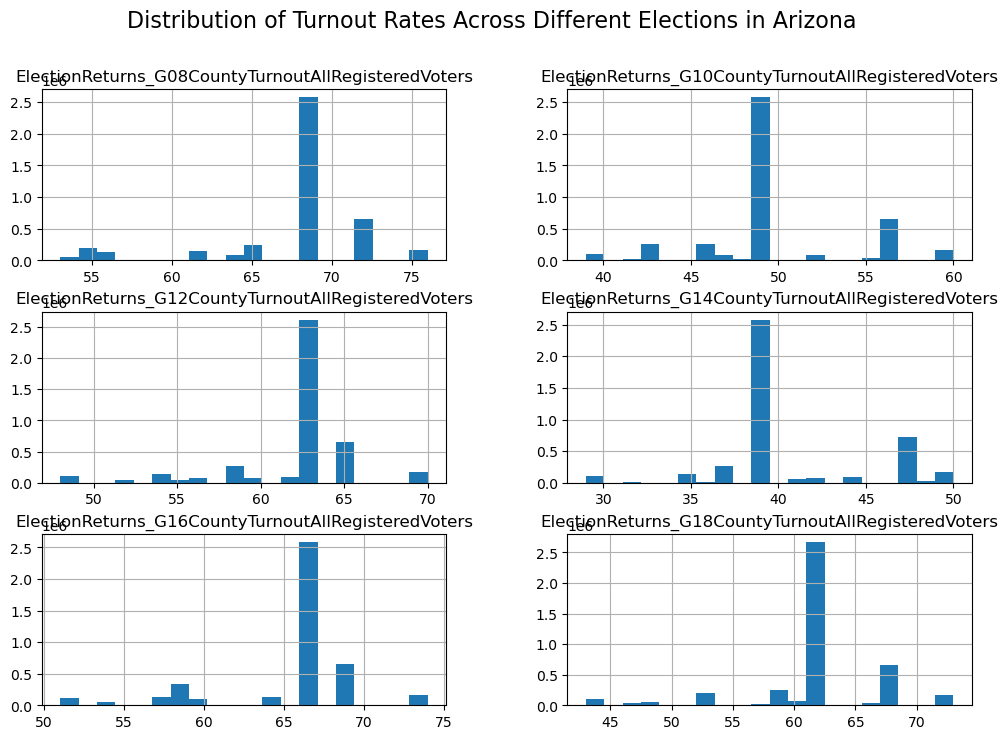

In [11]:
# convert to Pandas dataframe
data = turnout_df.toPandas()

# plot histogram for each column
data.hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Turnout Rates Across Different Elections in Arizona", fontsize=16)
plt.show()

## Age

In [9]:
# drop Null values and show statistical description 
age_df = df_need.select("Voters_Age").na.drop()
age_df.describe(["Voters_Age"]).show()
# drop Null values and show statistical description 
age_dfma = dfma_need.select("Voters_Age").na.drop()
age_dfma.describe(["Voters_Age"]).show()
# drop Null values and show statistical description 
age_dfnd = dfnd_need.select("Voters_Age").na.drop()
age_dfnd.describe(["Voters_Age"]).show()

+-------+------------------+
|summary|        Voters_Age|
+-------+------------------+
|  count|           4263282|
|   mean|50.750146952512175|
| stddev|  19.2521074283818|
|    min|                18|
|    max|                99|
+-------+------------------+



+-------+-----------------+
|summary|       Voters_Age|
+-------+-----------------+
|  count|          4569645|
|   mean|50.39094940635432|
| stddev|18.74700357172457|
|    min|              100|
|    max|               99|
+-------+-----------------+

+-------+-----------------+
|summary|       Voters_Age|
+-------+-----------------+
|  count|           296209|
|   mean|57.65399430807302|
| stddev|16.64653762148895|
|    min|               20|
|    max|               99|
+-------+-----------------+



findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.         
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


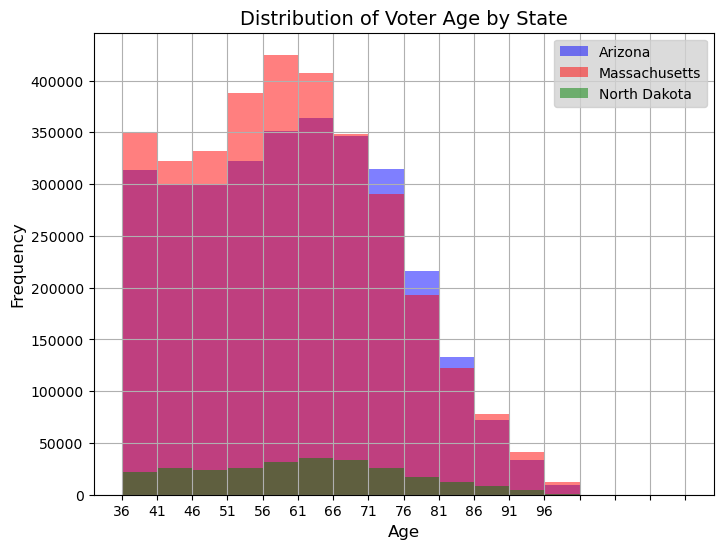

In [10]:
# sort the dataframes by age
age_df_sorted = age_df.sort('Voters_Age').toPandas()
age_dfma_sorted = age_dfma.sort('Voters_Age').toPandas()
age_dfnd_sorted = age_dfnd.sort('Voters_Age').toPandas()

# set the number of bins for the histograms
bins = list(range(18, 101, 5))

# plot the histograms for each dataframe with different colors
plt.hist(age_df_sorted, bins=bins, alpha=0.5, color='blue', label='Arizona')
plt.hist(age_dfma_sorted, bins=bins, alpha=0.5, color='red', label='Massachusetts')
plt.hist(age_dfnd_sorted, bins=bins, alpha=0.5, color='green', label='North Dakota')

# format the x-axis ticks
plt.xticks(bins)

# add x-axis label, y-axis label, and title to the plot
plt.xlabel('Age', fontsize=12, fontname='Arial')
plt.ylabel('Frequency', fontsize=12, fontname='Arial')
plt.title('Distribution of Voter Age by State', fontsize=14, fontname='Arial')

# add gridlines to the plot
plt.grid(True)

# add a legend to the plot
plt.legend(facecolor='lightgray', fontsize=10, loc='upper right')

# set the size of the plot
plt.gcf().set_size_inches(8, 6)

# show the plot
plt.show()




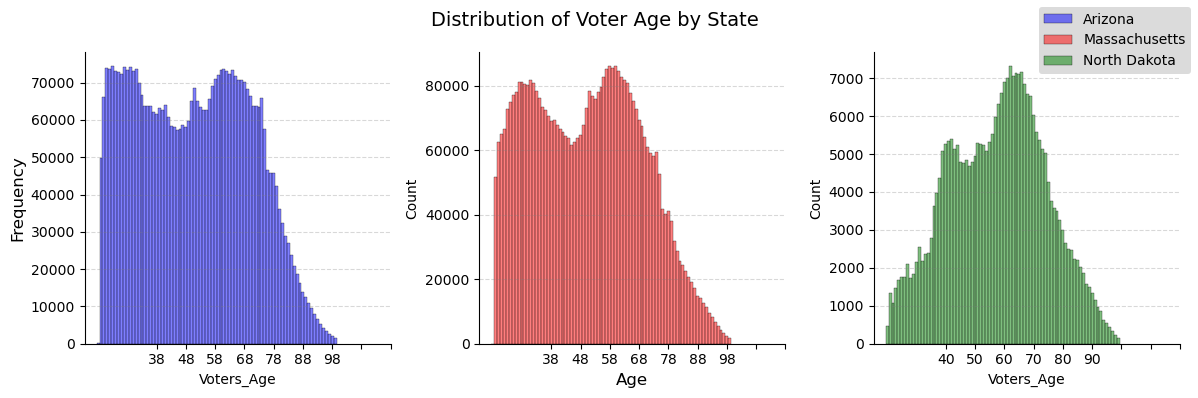

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# plot a histogram for each state in a separate subplot
sns.histplot(data=age_df_sorted, x='Voters_Age', bins=range(18, 101, 5), color='blue', alpha=0.5, ax=axes[0], label='Arizona')
sns.histplot(data=age_dfma_sorted, x='Voters_Age', bins=range(18, 101, 5), color='red', alpha=0.5, ax=axes[1], label='Massachusetts')
sns.histplot(data=age_dfnd_sorted, x='Voters_Age', bins=range(18, 101, 5), color='green', alpha=0.5, ax=axes[2], label='North Dakota')

# set common x and y-axis labels and a title for the plot
fig.suptitle('Distribution of Voter Age by State', fontsize=14, fontname='Arial')
axes[0].set_ylabel('Frequency', fontsize=12, fontname='Arial')
axes[1].set_xlabel('Age', fontsize=12, fontname='Arial')

# customize the tick labels
for ax in axes:
    ax.set_xticks(range(20, 101, 10))

# add gridlines to the plot
sns.despine()
for ax in axes:
    ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.3)

# add a legend to the plot
legend = fig.legend(facecolor='lightgray', fontsize=10, loc='upper right')
legend.get_frame().set_linewidth(0.0)

# adjust the layout of the subplots
plt.tight_layout()

# show the plot
plt.show()



## Gender

In [98]:
# Arizonadrop Null values and show statistical description 
sex_df = df_need.select("Voters_Gender").na.drop()
sex_df.groupBy("Voters_Gender").count().show()

#  MAdrop Null values and show statistical description 
sex_dfma = dfma_need.select("Voters_Gender").na.drop()
sex_dfma.groupBy("Voters_Gender").count().show()

# ND drop Null values and show statistical description 
sex_dfnd = dfnd_need.select("Voters_Gender").na.drop()
sex_dfnd.groupBy("Voters_Gender").count().show()

+-------------+-------+
|Voters_Gender|  count|
+-------------+-------+
|            F|2199156|
|            M|2044425|
+-------------+-------+



+-------------+-------+
|Voters_Gender|  count|
+-------------+-------+
|            F|2410533|
|            M|2140564|
+-------------+-------+



+-------------+------+
|Voters_Gender| count|
+-------------+------+
|            F|213993|
|            M|206680|
+-------------+------+



In [101]:
# Plot its distribution
data = sex_df.sort("Voters_Gender").toPandas()
datama = sex_dfma.sort("Voters_Gender").toPandas()
datand = sex_dfnd.sort("Voters_Gender").toPandas()

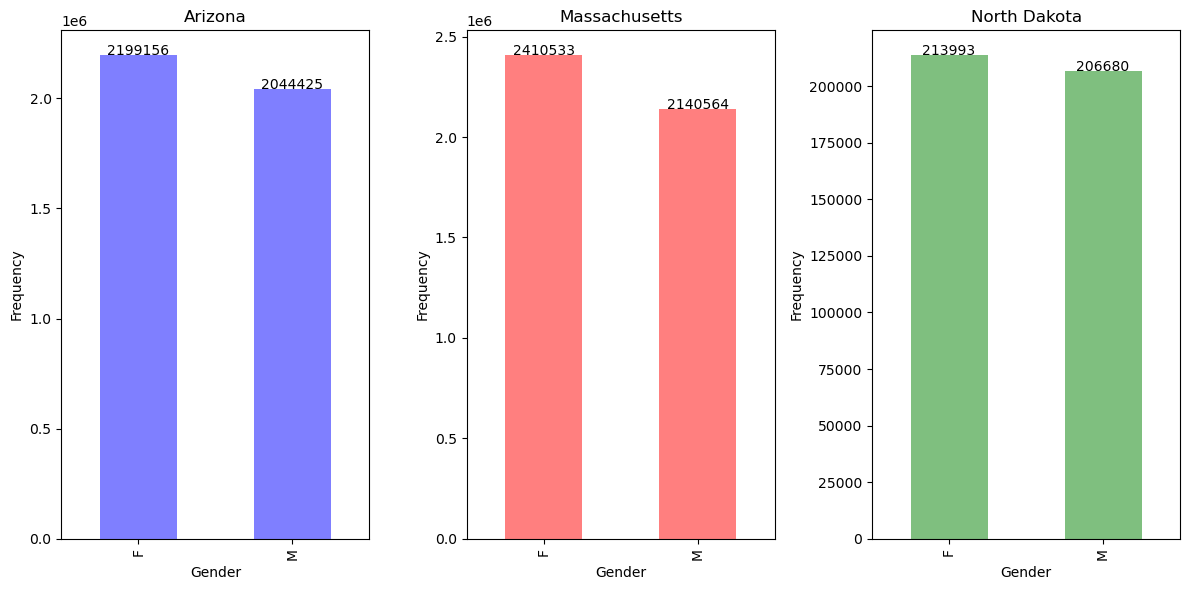

In [104]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

# Plot gender distribution for Arizona
counts1 = data['Voters_Gender'].value_counts().sort_index()
counts1.plot(kind='bar', color='blue', alpha=0.5, ax=ax1)
ax1.set_title('Arizona', fontsize=12)
ax1.set_xlabel('Gender', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)

# Add counts to Arizona plot
for i, patch in enumerate(ax1.patches):
    ax1.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 5, counts1[i], ha='center')

# Plot gender distribution for Massachusetts
counts2 = datama['Voters_Gender'].value_counts().sort_index()
counts2.plot(kind='bar', color='red', alpha=0.5, ax=ax2)
ax2.set_title('Massachusetts', fontsize=12)
ax2.set_xlabel('Gender', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)

# Add counts to Massachusetts plot
for i, patch in enumerate(ax2.patches):
    ax2.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 5, counts2[i], ha='center')

# Plot gender distribution for North Dakota
counts3 = datand['Voters_Gender'].value_counts().sort_index()
counts3.plot(kind='bar', color='green', alpha=0.5, ax=ax3)
ax3.set_title('North Dakota', fontsize=12)
ax3.set_xlabel('Gender', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)

# Add counts to North Dakota plot
for i, patch in enumerate(ax3.patches):
    ax3.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 5, counts3[i], ha='center')

# Set the layout
plt.tight_layout()

# Show the plot
plt.show()


## education level

In [107]:
# drop Null values and show statistical description 
edu_df = df_need.select("CommercialData_Education").na.drop()
edu_count = edu_df.groupBy("CommercialData_Education").count().show()
edu_dfma = dfma_need.select("CommercialData_Education").na.drop()
edu_countma =edu_dfma.groupBy("CommercialData_Education").count().show()
edu_dfnd = dfnd_need.select("CommercialData_Education").na.drop()
edu_countnd = edu_dfnd.groupBy("CommercialData_Education").count().show()

+------------------------+------+
|CommercialData_Education| count|
+------------------------+------+
|    Grad Degree - Ext...|178758|
|    Grad Degree - Likely|164353|
|    Bach Degree - Ext...|363891|
|     HS Diploma - Likely|273882|
|    Less than HS Dipl...|   428|
|    Some College - Li...|518686|
|    Vocational Techni...|  3245|
|    Some College -Ext...|129280|
|    HS Diploma - Extr...|275538|
|    Bach Degree - Likely|248133|
|    Less than HS Dipl...|125872|
+------------------------+------+



+------------------------+------+
|CommercialData_Education| count|
+------------------------+------+
|    Grad Degree - Ext...|358435|
|    Grad Degree - Likely|324245|
|    Bach Degree - Ext...|596976|
|     HS Diploma - Likely|293945|
|    Less than HS Dipl...|   486|
|    Some College - Li...|410362|
|    Vocational Techni...|  3676|
|    Some College -Ext...|110743|
|    HS Diploma - Extr...|414355|
|    Less than HS Dipl...|114442|
|    Bach Degree - Likely|348668|
+------------------------+------+

+------------------------+-----+
|CommercialData_Education|count|
+------------------------+-----+
|    Grad Degree - Ext...|18391|
|    Grad Degree - Likely|12740|
|    Bach Degree - Ext...|60840|
|     HS Diploma - Likely|31072|
|    Less than HS Dipl...|  119|
|    Some College - Li...|60280|
|    Vocational Techni...|  754|
|    Some College -Ext...|19307|
|    HS Diploma - Extr...|44622|
|    Less than HS Dipl...|11353|
|    Bach Degree - Likely|28444|
+------------------------+-

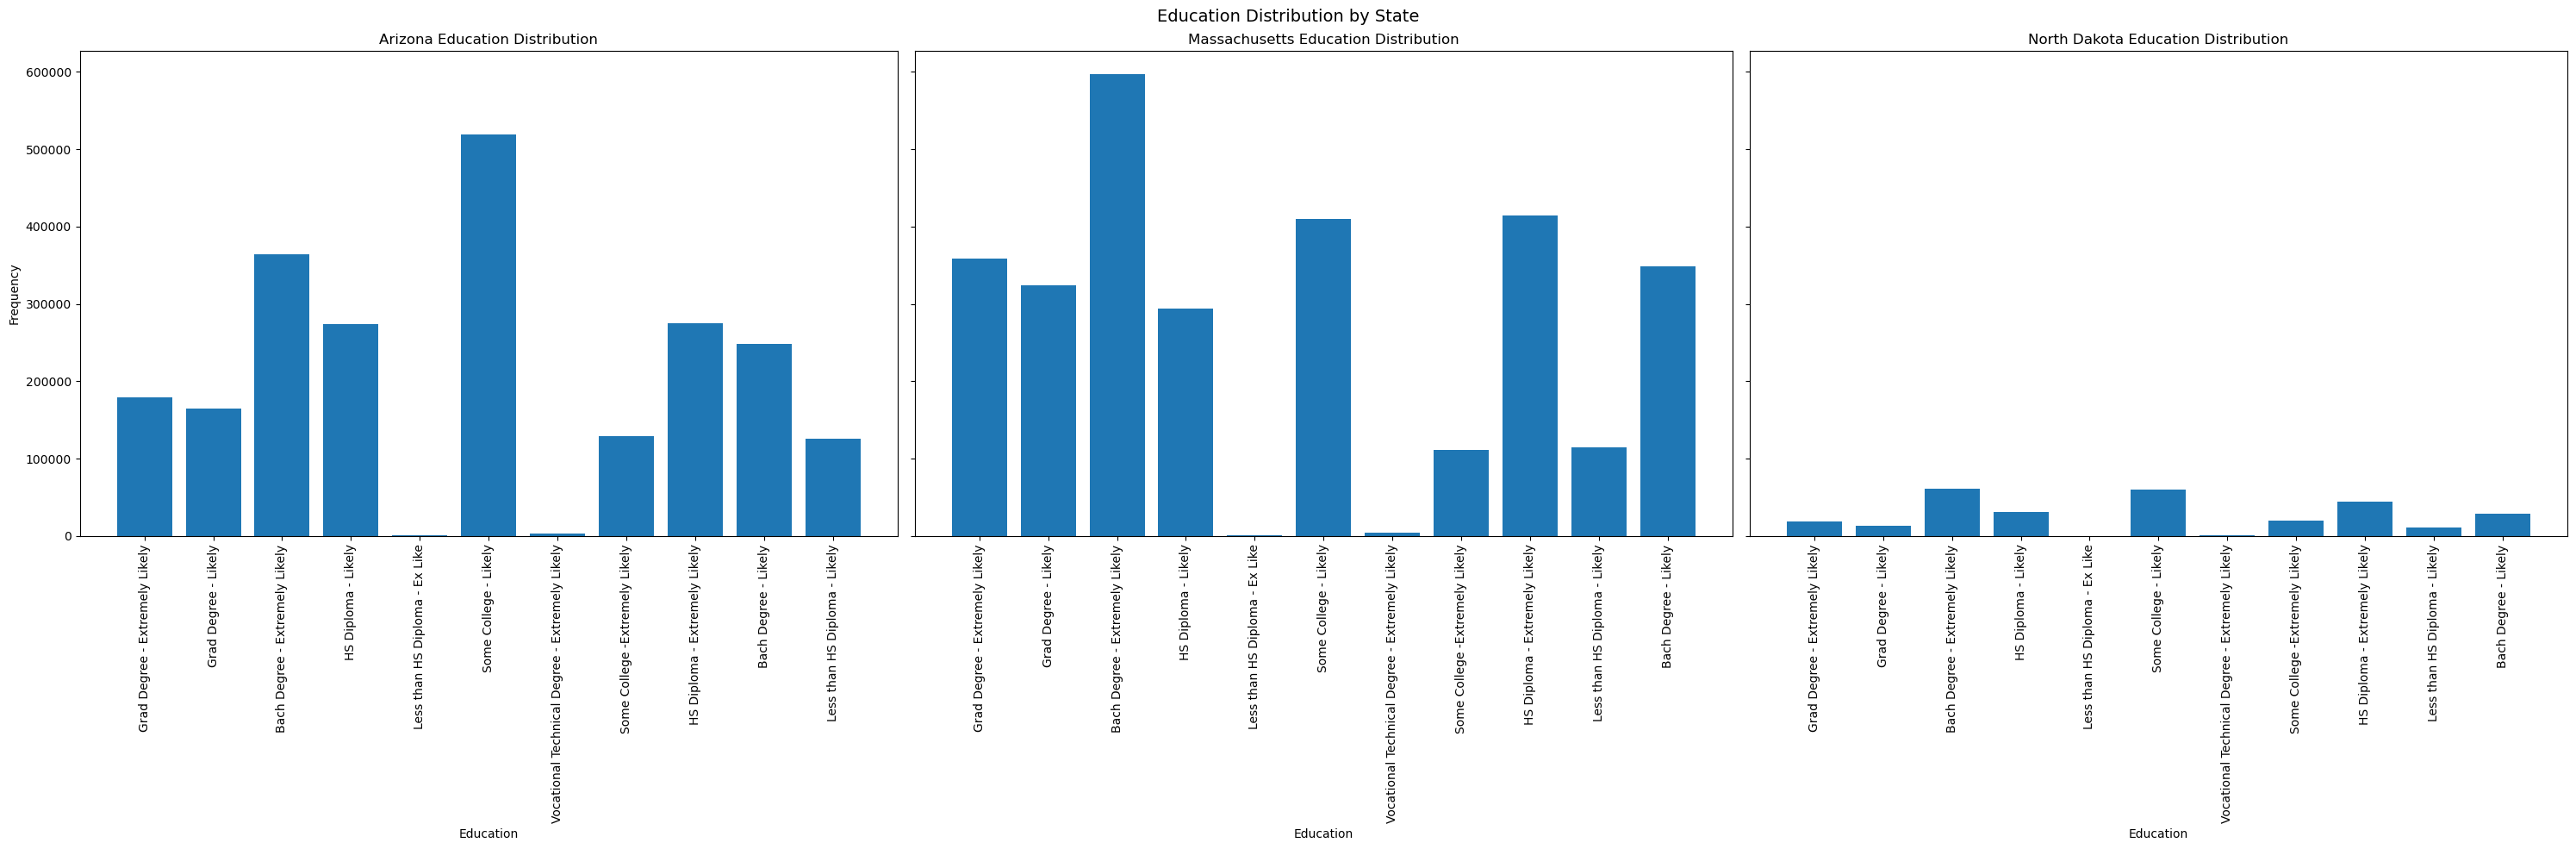

In [113]:
import matplotlib.pyplot as plt

# Get education distribution for all three dataframes
edu_df = df_need.select("CommercialData_Education").na.drop()
edu_df_grouped = edu_df.groupBy("CommercialData_Education").count()

edu_dfma = dfma_need.select("CommercialData_Education").na.drop()
edu_dfma_grouped = edu_dfma.groupBy("CommercialData_Education").count()

edu_dfnd = dfnd_need.select("CommercialData_Education").na.drop()
edu_dfnd_grouped = edu_dfnd.groupBy("CommercialData_Education").count()

# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 10), sharey=True)

# Plot education distribution for Arizona
edu_df_pd = edu_df_grouped.toPandas()
axs[0].bar(edu_df_pd["CommercialData_Education"], edu_df_pd["count"], width=0.8)
axs[0].set_title('Arizona Education Distribution')
axs[0].set_xlabel('Education')
axs[0].set_ylabel('Frequency')
axs[0].tick_params(axis='x', labelrotation=90)

# Plot education distribution for Massachusetts
edu_dfma_pd = edu_dfma_grouped.toPandas()
axs[1].bar(edu_dfma_pd["CommercialData_Education"], edu_dfma_pd["count"], width=0.8)
axs[1].set_title('Massachusetts Education Distribution')
axs[1].set_xlabel('Education')
axs[1].tick_params(axis='x', labelrotation=90)

# Plot education distribution for North Dakota
edu_dfnd_pd = edu_dfnd_grouped.toPandas()
axs[2].bar(edu_dfnd_pd["CommercialData_Education"], edu_dfnd_pd["count"], width=0.8)
axs[2].set_title('North Dakota Education Distribution')
axs[2].set_xlabel('Education')
axs[2].tick_params(axis='x', labelrotation=90)

# Set overall title and adjust layout
fig.suptitle('Education Distribution by State', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()


## Household income

In [15]:
# drop Null values and show statistical description 
hhincome_df = df_need.select("CommercialData_EstimatedHHIncomeAmount").na.drop()
hhincome_df = hhincome_df.withColumn("CommercialData_EstimatedHHIncomeAmount", expr("substring(CommercialData_EstimatedHHIncomeAmount, 2, length(CommercialData_EstimatedHHIncomeAmount))").cast(IntegerType()))

hhincome_dfma = dfma_need.select("CommercialData_EstimatedHHIncomeAmount").na.drop()
hhincome_dfma = hhincome_dfma.withColumn("CommercialData_EstimatedHHIncomeAmount", expr("substring(CommercialData_EstimatedHHIncomeAmount, 2, length(CommercialData_EstimatedHHIncomeAmount))").cast(IntegerType()))

hhincome_dfnd = dfnd_need.select("CommercialData_EstimatedHHIncomeAmount").na.drop()
hhincome_dfnd = hhincome_dfnd.withColumn("CommercialData_EstimatedHHIncomeAmount", expr("substring(CommercialData_EstimatedHHIncomeAmount, 2, length(CommercialData_EstimatedHHIncomeAmount))").cast(IntegerType()))


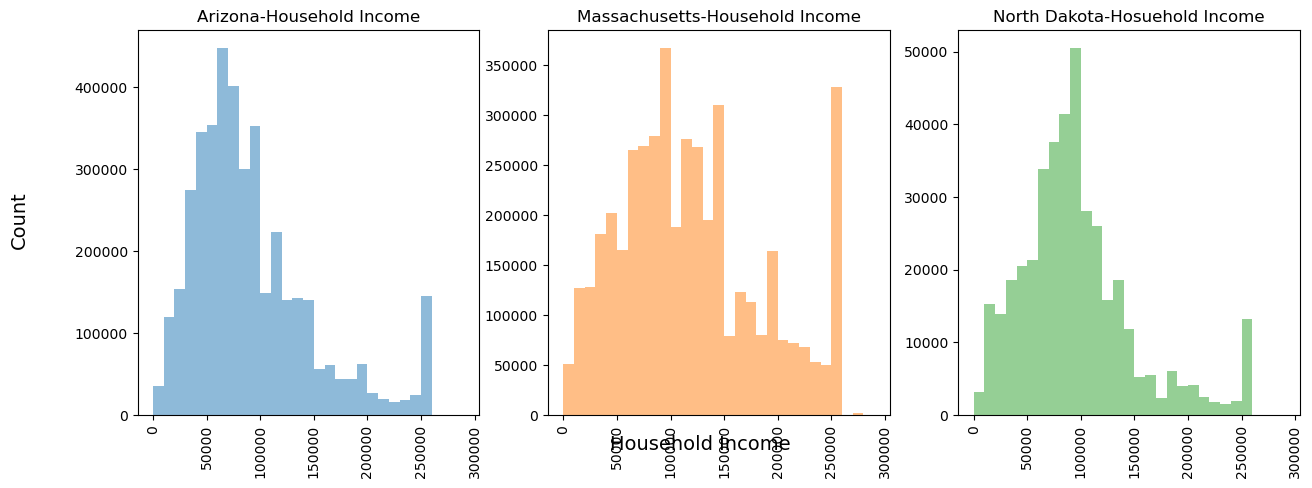

In [21]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define colors for each state
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

x1 = hhincome_df.toPandas()["CommercialData_EstimatedHHIncomeAmount"]
axs[0].hist(x1, bins=np.arange(0, 300000, 10000), alpha=0.5, color=colors[0])
axs[0].set_title("Arizona-Household Income")

x2 = hhincome_dfma.toPandas()["CommercialData_EstimatedHHIncomeAmount"]
axs[1].hist(x2, bins=np.arange(0, 300000, 10000), alpha=0.5, color=colors[1])
axs[1].set_title("Massachusetts-Household Income")

x3 = hhincome_dfnd.toPandas()["CommercialData_EstimatedHHIncomeAmount"]
axs[2].hist(x3, bins=np.arange(0, 300000, 10000), alpha=0.5, color=colors[2])
axs[2].set_title("North Dakota-Hosuehold Income")

# Set a common x and y label for all subplots
fig.text(0.5, 0.04, 'Household Income', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=14)

# Rotate x-axis labels 90 degrees
for ax in axs:
    ax.tick_params(axis='x', labelrotation=90)

# Show the plot
plt.show()



## Ethnic group

In [40]:
eth_count_df = df_need.select("EthnicGroups_EthnicGroup1Desc").na.drop()

eth_count_dfma = dfma_need.select("EthnicGroups_EthnicGroup1Desc").na.drop()

eth_count_dfnd = dfnd_need.select("EthnicGroups_EthnicGroup1Desc").na.drop()

TypeError: text() missing 1 required positional argument: 's'

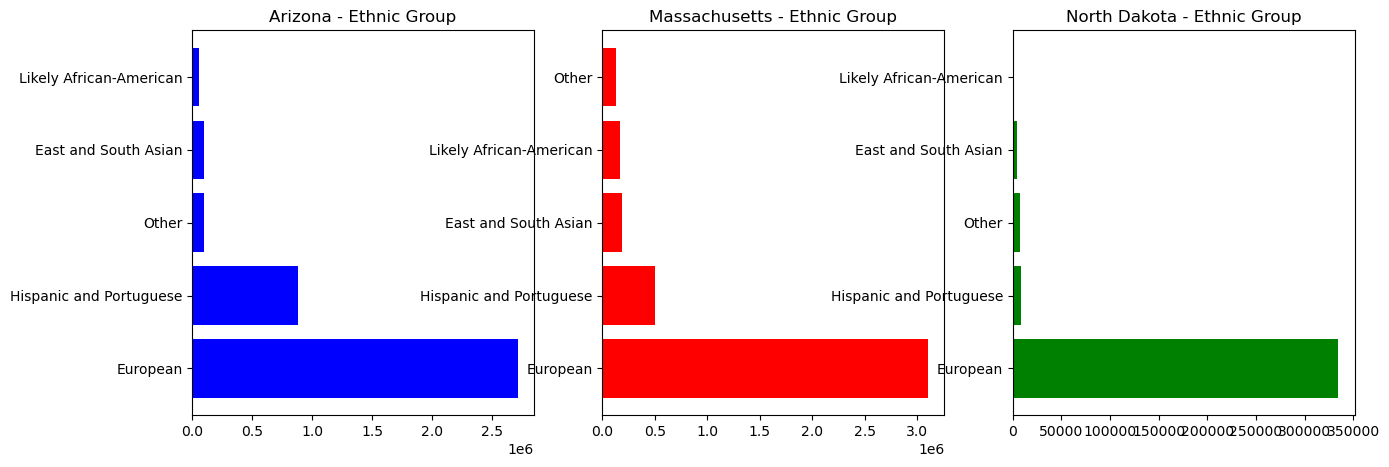

In [41]:
# Select the EthnicGroup1Desc column from each dataframe and count the number of occurrences
eth_count_df = eth_count_df.groupBy("EthnicGroups_EthnicGroup1Desc").agg(count("*").alias("count")).orderBy(desc("count"))

eth_count_dfma = eth_count_dfma.groupBy("EthnicGroups_EthnicGroup1Desc").agg(count("*").alias("count")).orderBy(desc("count"))

eth_count_dfnd = eth_count_dfnd.groupBy("EthnicGroups_EthnicGroup1Desc").agg(count("*").alias("count")).orderBy(desc("count"))

# Convert each dataframe to Pandas dataframe for plotting
eth_count_df_pd = eth_count_df.toPandas()
eth_count_dfma_pd = eth_count_dfma.toPandas()
eth_count_dfnd_pd = eth_count_dfnd.toPandas()

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the bar chart for each state
axs[0].barh(y=eth_count_df_pd["EthnicGroups_EthnicGroup1Desc"], width=eth_count_df_pd["count"], color="b")
axs[0].set_title("Arizona - Ethnic Group")

axs[1].barh(y=eth_count_dfma_pd["EthnicGroups_EthnicGroup1Desc"], width=eth_count_dfma_pd["count"], color="r")
axs[1].set_title("Massachusetts - Ethnic Group")

axs[2].barh(y=eth_count_dfnd_pd["EthnicGroups_EthnicGroup1Desc"], width=eth_count_dfnd_pd["count"], color="g")
axs[2].set_title("North Dakota - Ethnic Group")

# Set a common y label for all subplots
fig.text(0.06, 0.5, va='center', rotation='vertical', fontsize=14)

# Show the plot
plt.show()